# WeatherPy

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind = []
country = []
date = []
name = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(response['name'])
        print(f"Data found for {city}")
    except(KeyError, IndexError):
        print("Missing field/result... skipping.")       

Data found for karratha
Data found for hermanus
Data found for jacareacanga
Data found for aksu
Data found for iqaluit
Data found for rikitea
Data found for tura
Data found for ibra
Data found for gat
Data found for denpasar
Data found for nabire
Data found for ankang
Data found for buraydah
Data found for punta arenas
Data found for amahai
Missing field/result... skipping.
Data found for vaini
Data found for salalah
Missing field/result... skipping.
Data found for bluff
Data found for turukhansk
Data found for tsiroanomandidy
Data found for jamestown
Data found for walla walla
Data found for kodiak
Data found for dikson
Data found for deer lake
Data found for sfantu gheorghe
Data found for yellowknife
Data found for constitucion
Data found for clyde river
Data found for kasamwa
Data found for salinopolis
Data found for tuktoyaktuk
Data found for kikwit
Data found for taoudenni
Data found for nhulunbuy
Data found for bredasdorp
Missing field/result... skipping.
Data found for yerbogach

Data found for peterlee
Data found for brigantine
Data found for mount isa
Data found for rocha
Data found for tambo
Data found for awjilah
Data found for tasiilaq
Data found for muyezerskiy
Data found for mankono
Data found for marau
Data found for minsk
Data found for bandarbeyla
Data found for haines junction
Data found for udachnyy
Data found for russell
Data found for olinda
Data found for riyadh
Data found for inhambane
Data found for caarapo
Data found for martapura
Data found for cidreira
Data found for katsuura
Data found for carutapera
Data found for camabatela
Data found for souillac
Data found for cururupu
Missing field/result... skipping.
Missing field/result... skipping.
Data found for kinel
Data found for wahpeton
Data found for aberfeldy
Data found for pleshanovo
Data found for georgiyevka
Data found for ulaanbaatar
Data found for anloga
Data found for iraucuba
Data found for cooma
Data found for monterey
Data found for barrow
Data found for sola
Data found for chillico

### Convert Raw Data to DataFrame

In [4]:
output_dict = {
    "city": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
output_data = pd.DataFrame(output_dict)
output_data.to_csv("output_data.csv")
output_data.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karratha,-20.7377,116.8463,66.81,67,10,10.27,AU,1627498541
1,Hermanus,-34.4187,19.2345,55.80,71,6,16.26,ZA,1627498654
2,Jacareacanga,-6.2222,-57.7528,98.91,34,20,3.44,BR,1627498654
3,Aksu,41.1231,80.2644,85.98,28,50,8.32,CN,1627498552
4,Iqaluit,63.7506,-68.5145,49.73,61,75,5.01,CA,1627498496


In [5]:
output_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,19.893731,15.371634,70.473147,67.793706,50.743007,7.763059,1.627499e+09
std,33.446298,88.731942,15.405718,22.931088,40.416640,5.363528,1.256254e+02
min,-54.800000,-179.166700,32.770000,10.000000,0.000000,0.000000,1.627498e+09
25%,-8.948000,-59.930325,58.347500,55.000000,6.000000,3.650000,1.627499e+09
50%,25.403650,20.161500,72.160000,74.000000,49.500000,6.670000,1.627499e+09
75%,48.303275,88.224325,81.775000,86.000000,93.250000,10.432500,1.627499e+09
max,78.218600,179.316700,108.360000,100.000000,100.000000,27.380000,1.627499e+09


## Inspect the data and remove the cities where the humidity > 100%

In [6]:
max(output_data['Humidity'])

100

In [7]:
clean_city_data = output_data.loc[output_data['Humidity']<= 100]

In [8]:
clean_city_data.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karratha,-20.7377,116.8463,66.81,67,10,10.27,AU,1627498541
1,Hermanus,-34.4187,19.2345,55.80,71,6,16.26,ZA,1627498654
2,Jacareacanga,-6.2222,-57.7528,98.91,34,20,3.44,BR,1627498654
3,Aksu,41.1231,80.2644,85.98,28,50,8.32,CN,1627498552
4,Iqaluit,63.7506,-68.5145,49.73,61,75,5.01,CA,1627498496


## Plotting the Data

### Latitude vs. Temperature Plot

The code is using latitude and max temperature data for each city to create a scatter plot and then save it as a png file.

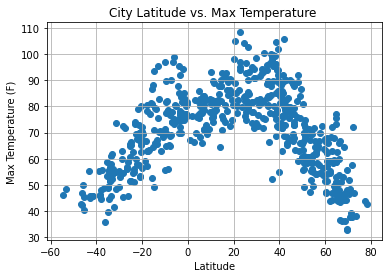

In [9]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature ')
plt.savefig('lat_temp.png')
plt.grid()
plt.show()

### Latitude vs. Humidity Plot

The code is using latitude and humidity data for each city to create a scatter plot and then save it as a png file.

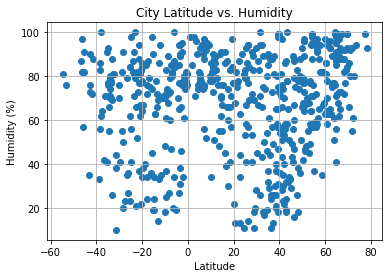

In [10]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity' )
plt.savefig('lat_humidity.png')
plt.grid()
plt.show()

### Latitude vs. Cloudiness Plot

The code is using latitude and cloudiness data for each city to create a scatter plot and then save it as a png file.

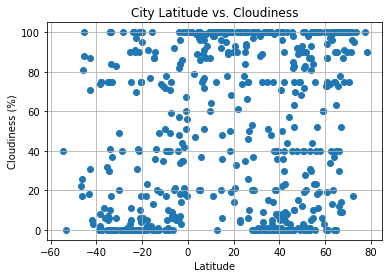

In [11]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.savefig('lat_cloud.png')
plt.grid()
plt.show()

### Latitude vs.Wind Speed Plot

The code is using latitude and wind speed data for each city to create a scatter plot and then save it as a png file.

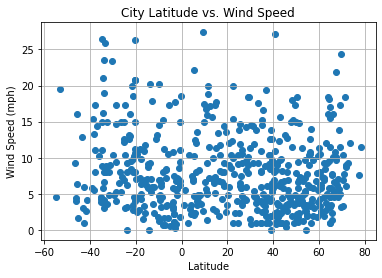

In [12]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed' )
plt.savefig('lat_wind.png')
plt.grid()
plt.show()

# Linear Regression
### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.44399253138086076


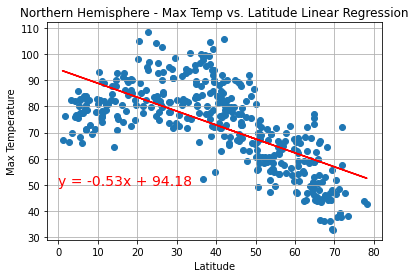

In [13]:
x_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression' )
plt.savefig('reg_lat_temp_north.png')
plt.grid()
plt.show()

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6454159369560184


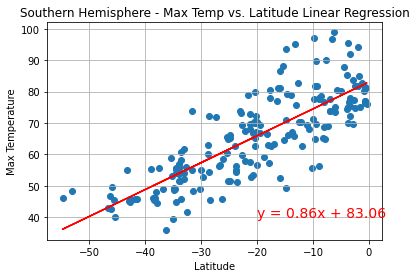

In [14]:
x_values = clean_city_data.loc[clean_city_data['Lat'] <= 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] <= 0]['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression' )
plt.savefig('reg_lat_temp_south.png')
plt.grid()
plt.show()

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006095421061476999


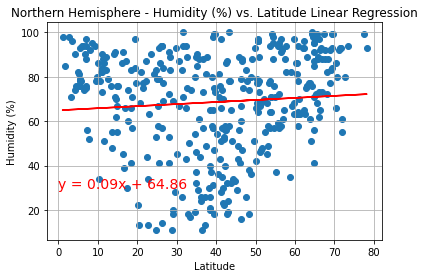

In [15]:
x_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig('reg_lat_humid_north.png')
plt.grid()
plt.show()

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0030826650351668716


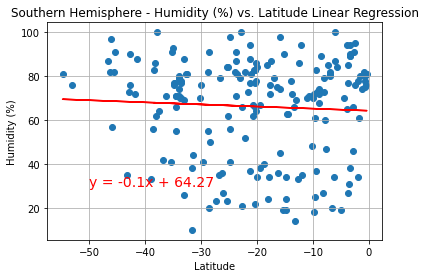

In [16]:
x_values = output_data.loc[output_data['Lat'] <= 0]['Lat']
y_values =  output_data.loc[output_data['Lat'] <= 0]['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('reg_lat_humid_south.png')
plt.grid()
plt.show()

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005172111564249355


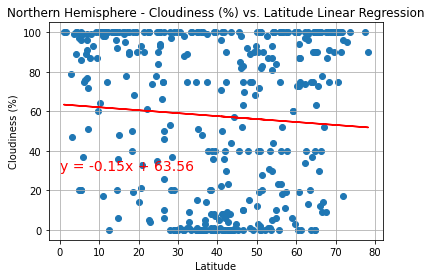

In [17]:
x_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('reg_lat_cloud_north.png')
plt.grid()
plt.show()

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0038232715220603377


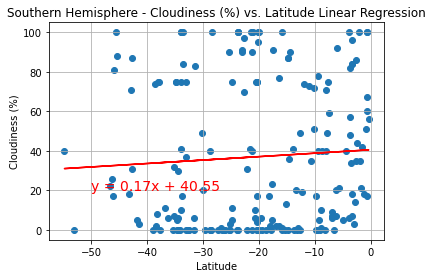

In [22]:
x_values = clean_city_data.loc[clean_city_data['Lat'] <= 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] <= 0]['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('reg_lat_cloud_south.png')
plt.grid()
plt.show()

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004354336689003336


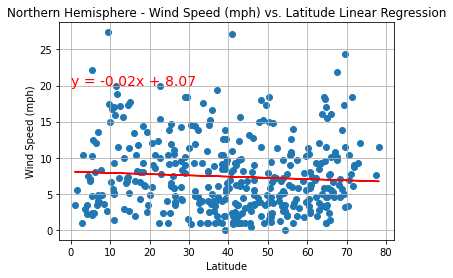

In [19]:
x_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] >= 0]['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('reg_lat_wind_north.png')
plt.grid()
plt.show()

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04070506557675156


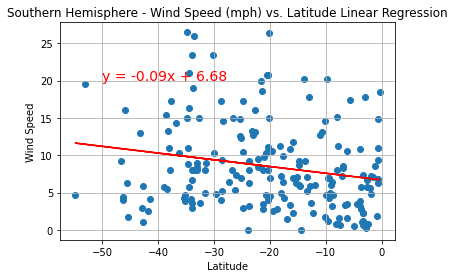

In [20]:
x_values = clean_city_data.loc[clean_city_data['Lat'] <= 0]['Lat']
y_values = clean_city_data.loc[clean_city_data['Lat'] <= 0]['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('reg_lat_wind_south.png')
plt.grid()
plt.show()

## Analysis
1. In the northern hemisphere as latitude increases, the maximum temperature drops. On the other hand, in the southern hemisphere as latitude increases, the maximum temperature also increases. This means that, as we approach the equator, the weather gets hotter.
2. We did not find any strong correlation between latitude and cloudiness.
3. Also, we did not find any strong correlation between latitude and wind speed.